In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d

In [2]:
file = '../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-10-15T10_28_18.736.fits'

In [3]:
spec = spec2d.Spec2d(file, xtrim=[2000, 24000], ytrim=[34, 65])


Loading file ../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-10-15T10_28_18.736.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-10-15T10_28_18.736.fits (HDU=0)
The input dataset was trimmed
 xrange: 2000:24001.  yrange: 34:66
Final data dimensions (x y): 22001 x 32

Dispersion axis:              x
N_pixels along dispersion axis: 22001



In [4]:
v_data = fits.open(file)[1].data[34:66, 2000:24001]**2

In [5]:
spec.vardata =v_data

Profile max value (before normalization) 108.006424


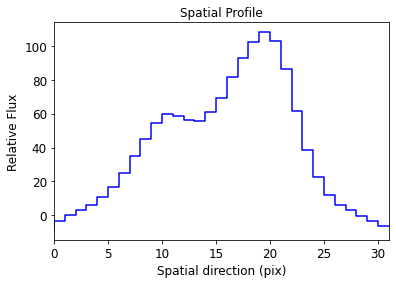

In [6]:
profile = spec.spatial_profile(pixrange=[10000, 11500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 10, 14, 1.5

amplitude=10.000000, mu=14.000000, sigma=1.500000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 105, 19.5, 2, 3

amplitude=105.000000, x_0=19.500000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 2 : 25, 16, 1.5, 2

amplitude=25.000000, x_0=16.000000, gamma=1.500000, alpha=2.000000

Parameters of Moffat profile 3 : 55, 10.5, 2, 3

amplitude=55.000000, x_0=10.500000, gamma=2.000000, alpha=3.000000

Fitted 

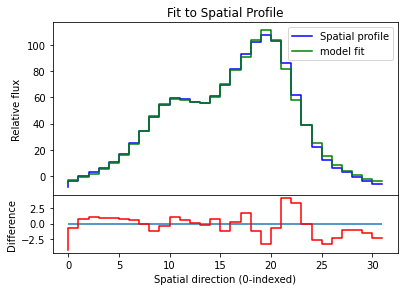

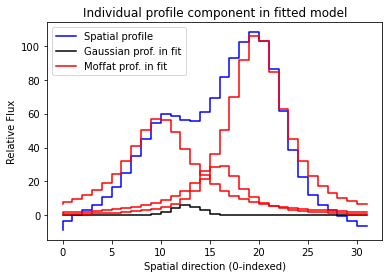


Do you want to start over ? : type yes/no
no


In [17]:
mod = spec.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 4

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 105, 19.5, 2, 3

amplitude=105.000000, x_0=19.500000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 2 : 25, 16, 1.5, 2

amplitude=25.000000, x_0=16.000000, gamma=1.500000, alpha=2.000000

Parameters of Moffat profile 3 : 10, 14, 1.5, 2

amplitude=10.000000, x_0=14.000000, gamma=1.500000, alpha=2.000000

Parameters of Moffat profile 4 : 55, 10.5, 2, 3

amplitude=55.000000, x_0=10.500000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
E

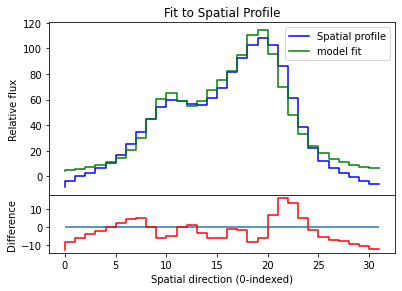

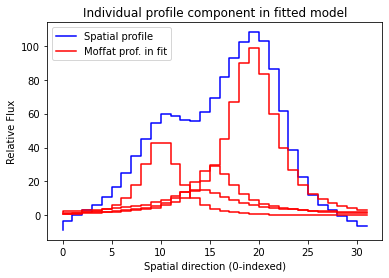


Do you want to start over ? : type yes/no
no


In [14]:
mod = spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4]
Components: 
    [0]: <Polynomial1D(0, c0=-13.50401966)>

    [1]: <Gaussian1D(amplitude=6.01817365, mean=13.21625821, stddev=1.47929161)>

    [2]: <Moffat1D(amplitude=107.14575661, x_0=20.32747108, gamma=3.56052976, alpha=1.20141815)>

    [3]: <Moffat1D(amplitude=30.08591385, x_0=16.61740196, gamma=2.43249324, alpha=0.95622807)>

    [4]: <Moffat1D(amplitude=57.33569361, x_0=10.4247705, gamma=3.78889627, alpha=0.98720613)>
Parameters:
            c0_0           amplitude_1    ...      gamma_4            alpha_4      
    ------------------- ----------------- ... ------------------ ------------------
    -13.504019659419782 6.018173653640989 ... 3.7888962651709326 0.9872061322364127

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] +

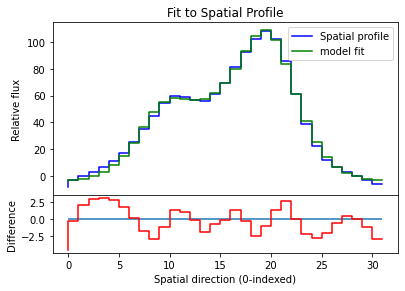

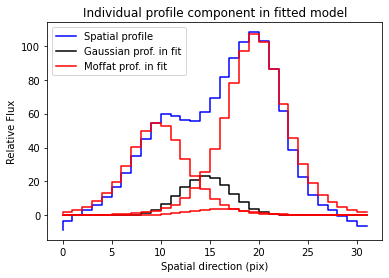

<CompoundModel(c0_0=-5.44659675, amplitude_1=23.30232655, mean_1=15.13751336, stddev_1=2.58710325, amplitude_2=107.00455246, x_0_2=20.2008045, gamma_2=6.82155969, alpha_2=3.14593296, amplitude_3=3.97137101, x_0_3=16.71979184, gamma_3=6.82155969, alpha_3=3.14593296, amplitude_4=54.72566043, x_0_4=10.2008045, gamma_4=6.82155969, alpha_4=3.14593296)>

In [20]:
def tie_pos1_moffat(model):
    return model.x_0_2 - (0.78 / 0.158) # xshooter pixscale in visible wavelength 0.158 #1.635

def tie_pos2_moffat(model):
    return model.x_0_2 - (1.58 / 0.158) #2.1

def tie_pos3_moffat(model):
    return model.x_0_2 - (0.58 / 0.158)

def tie_gamma_moffat(model):
    return model.gamma_2

def tie_alpha_moffat(model):
    return model.alpha_2 

spec.mod0[1].mean.tied = tie_pos1_moffat
spec.mod0[3].x_0.tied = tie_pos3_moffat
spec.mod0[4].x_0.tied = tie_pos2_moffat

#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
spec.mod0[4].gamma.tied = tie_gamma_moffat
spec.mod0[4].alpha.tied = tie_alpha_moffat
spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 880 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3
Fitting polynomial of degree 3 to parameter: x_0_4
Fitting polynomial of degree 3 to parameter: gamma_4
Fitting polynomial of degree 3 to parameter: alpha_4


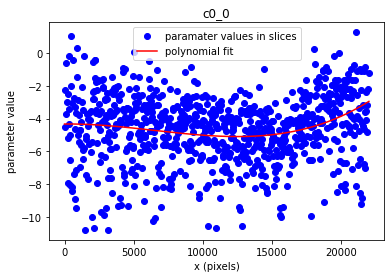

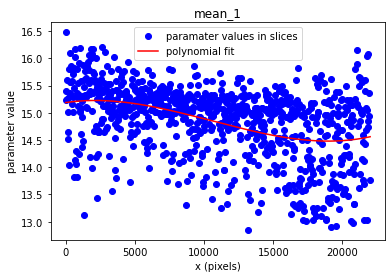

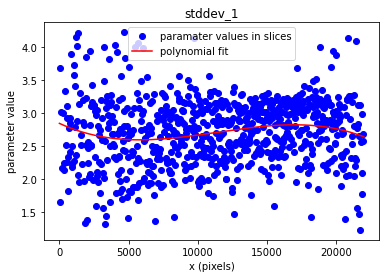

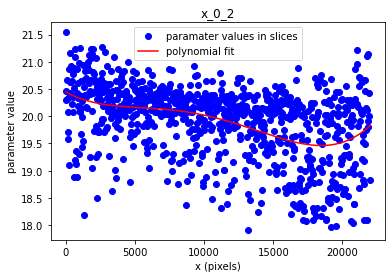

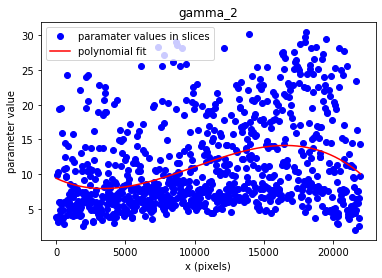

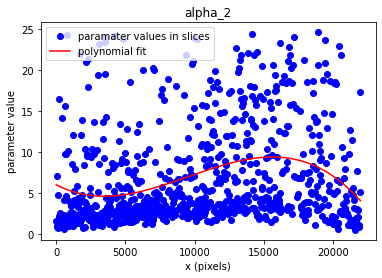

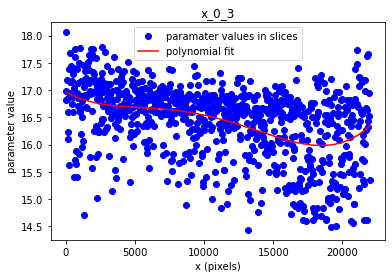

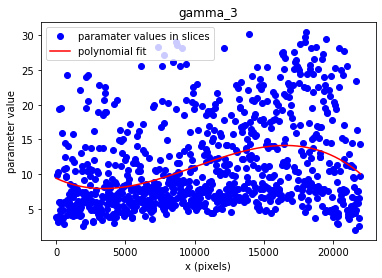

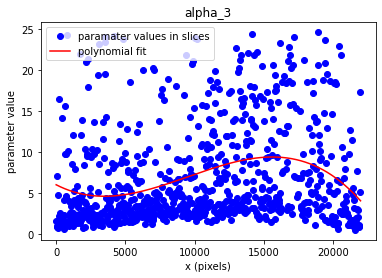

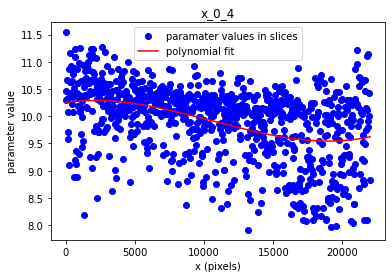

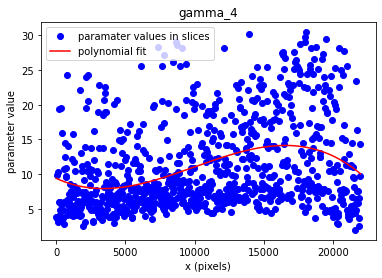

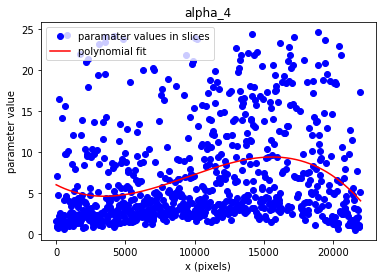

In [21]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4},
                    polyorder=3) #fitrange=fitrange_list[i]
plt.show()

Fitting to 4 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 22001
Fitting to the trace at 22001 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:   573.66
 Spectrum End:     1013.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   573.66
 Spectrum End:     1013.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   573.66
 Spectrum End:     1013.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   573.66
 Spectrum End:     1013.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02


Plotting the spectrum


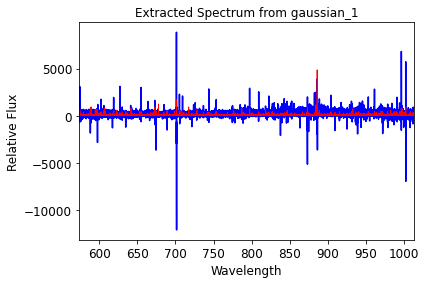

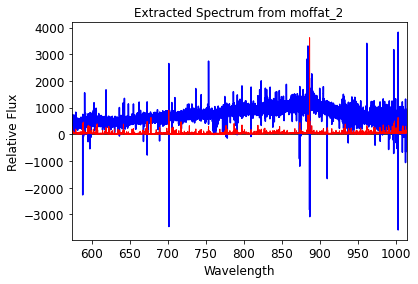

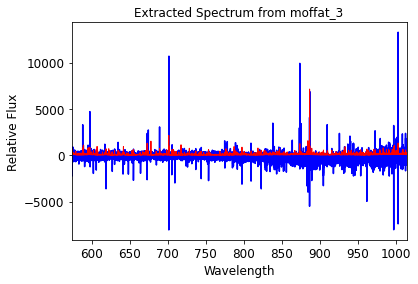

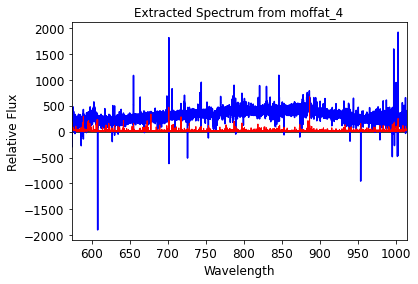

In [22]:
spec.extract(method='modelfit') #, extrange=ext)
plt.show()

In [23]:
sp_im = spec1d.Spec1d(wav=spec.spectra[0][1]['wav']*10, flux = spec.spectra[0][1]['flux'],
                      var=spec.spectra[0][1]['var'])

 Spectrum Start:  5736.60
 Spectrum End:    10136.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


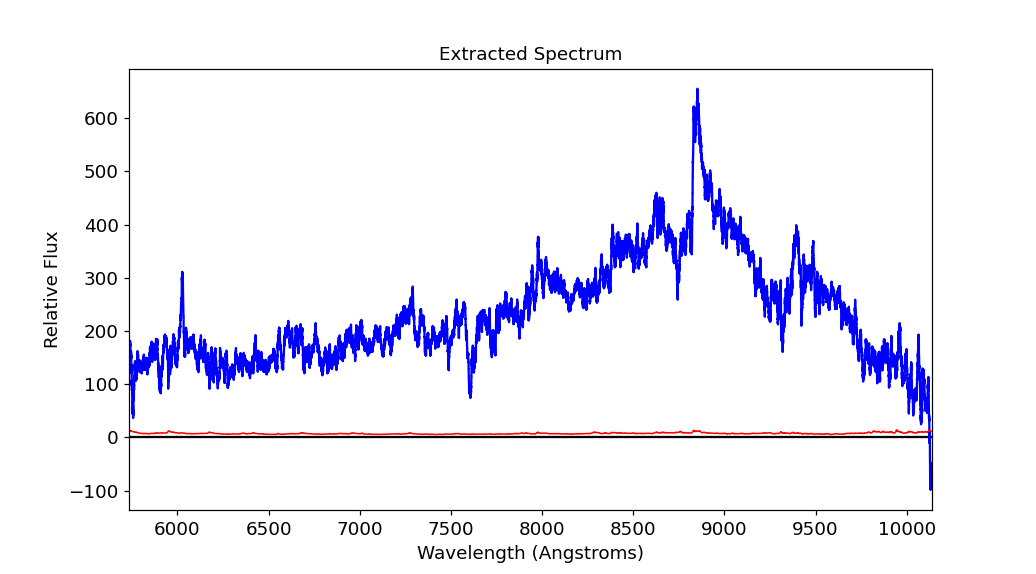

In [30]:
%matplotlib notebook
sp_im.smooth(61)
#sp_im.mark_lines('strongem', z=2.16, usesmooth=True)

In [31]:
sp_d = spec1d.Spec1d(wav=spec.spectra[1][1]['wav'][0:-1]*10, 
                       flux = spec.spectra[1][1]['flux'][0:-1], 
                      var = spec.spectra[1][1]['var'][0:-1])

 Spectrum Start:  5736.60
 Spectrum End:    10136.40
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


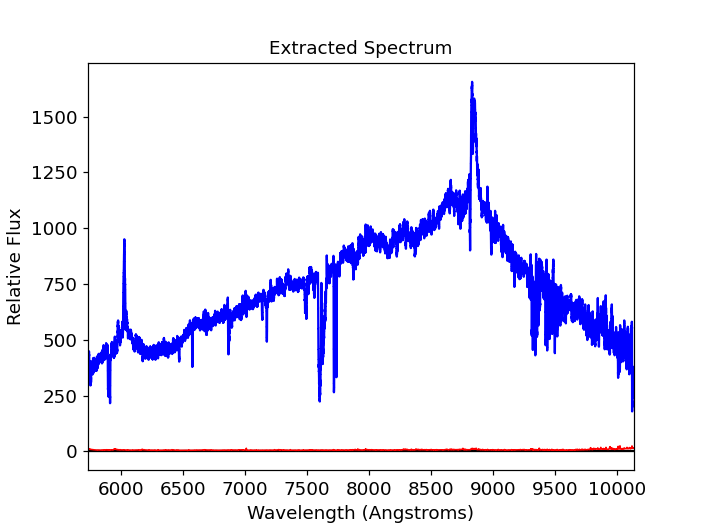

In [33]:
sp_d.smooth(21)
#sp_im1.mark_lines('strongem', z=3.81, usesmooth=True)
#sp_d.mark_lines('abs', z=0.651, usesmooth=True)

In [30]:
sp_im2 = spec1d.Spec1d(wav=spec.spectra[2][1]['wav'][0:-1]*10, 
                     flux = spec.spectra[2][1]['flux'][0:-1],
                     var = spec.spectra[2][1]['var'][0:-1])

 Spectrum Start:  5736.60
 Spectrum End:    10136.40
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


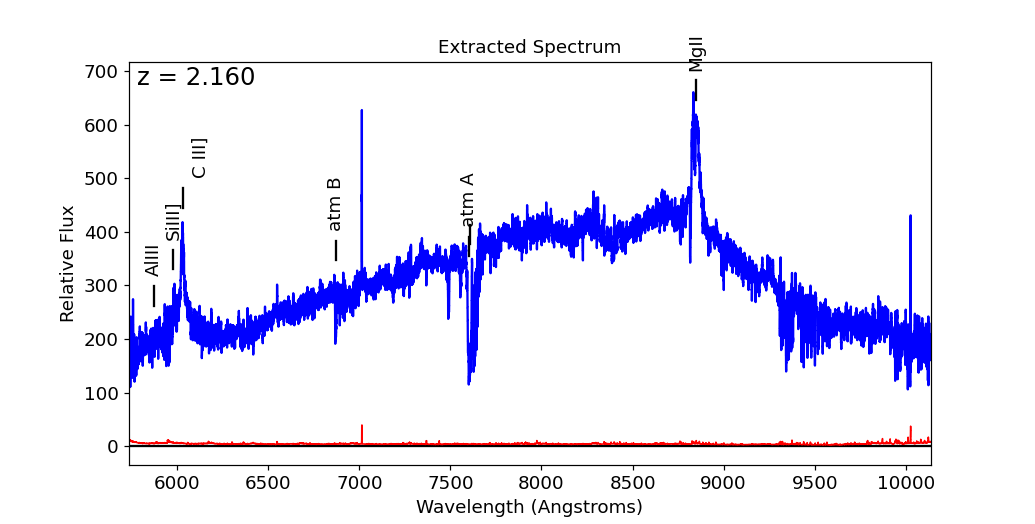


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Al III        1858.70       5873.49
Si III]       1892.00       5978.72
C III]        1908.70       6031.49
Mg II         2799.80       8847.37



In [31]:
sp_im2.smooth(11)
#sp_im2.mark_lines('abs', z=0.626, usesmooth=True, markatm=True)
sp_im2.mark_lines('strongem', z=2.16, usesmooth=True, markatm=True)